In [1]:
'''
    ################### Convulational Neural Network (CNN) #######################

    Convulation is basically a operator in maths, like other operators e.g: add, subtrace
    In this we have a kernel/filter which search or look on whole image and then it will
    just extract important features and gives us feature map... 
    after that we have pooling (Max, Average, Add), it will reduce feature map
    Most famous is MAX, in which we choose max value from feature map and reduce its dimensions

    Problem with ANN is that it is fully connected(every neuron with every neuron), so it
    will not be good for large inputs. (slow, and waste of resources as well), so for computer
    vision we prefer CNN over ANN.
    one more difference is we need to flat the image in ANN, while here no need of it.

    When CNN will done, it will hand over to one layer of ANN then ANN will handover to output layer

    e.g: (convucational and Pooling will be same like hidden layer in ann, we can have more than 1)

    Input    Convucational   Pooling     Dense(Fully connected)     Output

    x1          x               x           o                           o

    x2          x               x           o
'''

'\n    ################### Convulational Neural Network (CNN) #######################\n\n    Convulation is basically a operator in maths, like other operators e.g: add, subtrace\n    In this we have a kernel/filter which search or look on whole image and then it will\n    just extract important features and gives us feature map... \n    after that we have pooling (Max, Average, Add), it will reduce feature map\n    Most famous is MAX, in which we choose max value from feature map and reduce its dimensions\n\n    Problem with ANN is that it is fully connected(every neuron with every neuron), so it\n    will not be good for large inputs. (slow, and waste of resources as well), so for computer\n    vision we prefer CNN over ANN.\n    one more difference is we need to flat the image in ANN, while here no need of it.\n\n    When CNN will done, it will hand over to one layer of ANN then ANN will handover to output layer\n\n    e.g: (convucational and Pooling will be same like hidden layer i

In [2]:
import numpy as np
import pandas as pd

import tensorflow as tf

# Check available devices.
# from tensorflow.python.client import device_lib
# print("Devices:")
# print(device_lib.list_local_devices())

2025-11-06 09:49:58.625207: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-06 09:49:58.666182: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2025-11-06 09:49:59.548565: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [3]:
# Loading Dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

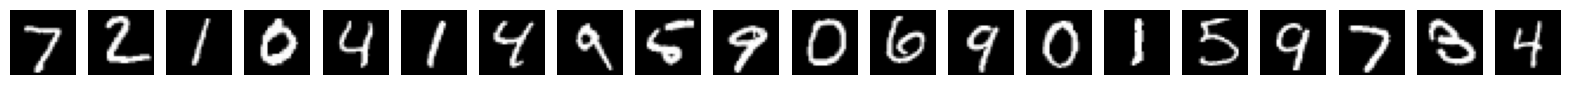

In [4]:
# Let's visualize top 10 images
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 2)) # create a figure to display images

n=20 #number of digits to display
for i in range(n):
    #create subplot in figure
    plt.subplot(1, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.axis('off')

plt.show()

In [5]:
# Dataset Shapes
print("Type of X_train: ", type(X_train))
print("Shape of X_train:", X_train.shape)

print("Type of y_train: ", type(y_train))
print("Shape of y_train:", y_train.shape)

print("Type of X_test: ", type(X_test))
print("Shape of X_test:", X_test.shape)

print("Type of y_test: ", type(y_test))
print("Shape of y_test:", y_test.shape)

# We are working on one-channel images (Gray Scale, no RGB in them, either Gray or White)


Type of X_train:  <class 'numpy.ndarray'>
Shape of X_train: (60000, 28, 28)
Type of y_train:  <class 'numpy.ndarray'>
Shape of y_train: (60000,)
Type of X_test:  <class 'numpy.ndarray'>
Shape of X_test: (10000, 28, 28)
Type of y_test:  <class 'numpy.ndarray'>
Shape of y_test: (10000,)


In [6]:
# Reshape
# Add Channel Last, we adding one, as our data is Gray Scale
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [7]:
# Scaling
# Scale/Normalize between 0 to 1 instead of 0 to 255

X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [8]:
# One Hot Encoding
# Reshaping Y for MultiClass Classification

y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

# Dataset Updated Shapes
print("Shape of X_train:", X_train.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (60000, 28, 28, 1)
Shape of y_train: (60000, 10)
Shape of X_test: (10000, 28, 28, 1)
Shape of y_test: (10000, 10)


In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten

In [10]:
# Structure Of Model

# Image Dimensions
img_rows, img_cols, channels = 28, 28, 1

# filters/kernels for each layer of neurons
filters = [6, 32, 80]

classes = 10

model = Sequential()

# Convulational Layer
model.add(Conv2D(
            filters[0],             # filter size
            (3,3),                  # filter dimension
            padding="same",         # padding same means, in output don't shrink the original.
            activation="relu",
            input_shape=(img_rows, img_cols, channels)
        ))

# Pooling Layer
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters[1], (2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(filters[2], (2,2), padding="same", activation="relu"))
model.add(MaxPooling2D(pool_size = (2,2)))

# Previous layers has 2D data, now convert them to 1D.
model.add(Flatten()) 
model.add(Dense(64, activation="relu"))
model.add(Dense(classes, activation="softmax"))

# Connect all layers now.
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='sgd')

/home/maadi/Desktop/my_tasks/python/models_and_datasets/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
W0000 00:00:1762404600.718804    9099 gpu_device.cc:2342] Cannot dlopen some GPU libraries. Please make sure the missing libraries mentioned above are installed properly if you would like to use GPU. Follow the guide at https://www.tensorflow.org/install/gpu for how to download and setup the required libraries for your platform.
Skipping registering GPU devices...


In [11]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 6)      │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 6)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │           800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 80)       │        10,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 3, 3, 80)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 720)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        46,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 57,974 (226.46 KB)

 Trainable params: 57,974 (226.46 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
'''
    Parameters Calculation

    layer_1 => (filter_height * filter_width * input_channels + 1) * number_of_filters = parameters.
    other_layers => (filter_height * filter_width * number_of_filters_in_prev_layer + 1) * number_of_filters = parameters.
    layer_1 = (3*3+1+1)*6 = 60
    layer_2 = (2*2*6+1)*32 = 800
'''

'\n    Parameters Calculation\n\n    (filter_height * filter_width * input_channels + 1) * number_of_filters = parameters.\n    layer_1 = (3*3+1+1)*6 = 60\n'

In [13]:
# Taining Model

model.fit(X_train, y_train, validation_split=0.2, epochs=15, batch_size=64, verbose=1)

Epoch 1/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.6123 - loss: 1.2465 - val_accuracy: 0.8750 - val_loss: 0.3984
Epoch 2/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9013 - loss: 0.3187 - val_accuracy: 0.9324 - val_loss: 0.2260
Epoch 3/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9347 - loss: 0.2070 - val_accuracy: 0.9524 - val_loss: 0.1538
Epoch 4/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9513 - loss: 0.1582 - val_accuracy: 0.9590 - val_loss: 0.1360
Epoch 5/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9598 - loss: 0.1301 - val_accuracy: 0.9586 - val_loss: 0.1347
Epoch 6/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9658 - loss: 0.1095 - val_accuracy: 0.9655 - val_loss: 0.1107
Epoch 7/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9699 - loss: 0.0988 - val_accuracy: 0.9718 - val_loss: 0.0921
Epoch 8/15
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9734 - loss: 0.0869 - val_accuracy: 0.

In [14]:
# Testing the model
from sklearn.metrics import  accuracy_score
import numpy as np

y_pred_probs = model.predict(X_test, verbose = 1)
y_pred = np.where(y_pred_probs > 0.5, 1, 0)

test_accuracy = accuracy_score(y_pred, y_test)

test_accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


0.9803

In [ ]:
# test with random images, and there label with visualization

X_valid = X_test[0:20]
actual_labels = y_test[0:20]

y_pred_probs_valid = model.predict(X_valid)
Y_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step


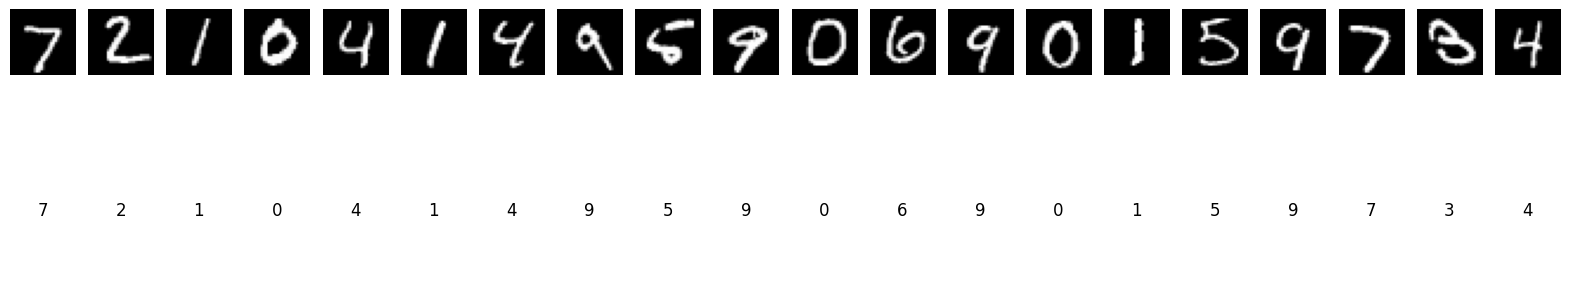

In [16]:
n= len(X_valid)

plt.figure(figsize=(20, 4)) # create a figure to display images

for i in range(n):
    #create subplot in figure
    plt.subplot(2, n, i+1)
    plt.imshow(X_test[i].reshape(28, 28), cmap="gray")
    plt.axis('off')

    predicted_digit = np.argmax(y_pred_probs_valid[i])
    plt.subplot(2, n, i+1+n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')
plt.show()

plt.close()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


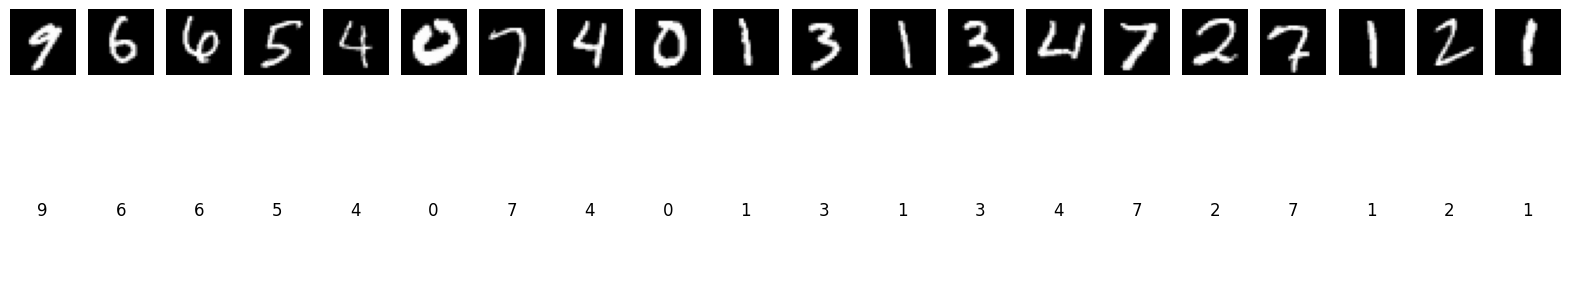

In [18]:
# test with random images, and there label with visualization

X_valid = X_test[20:40]
actual_labels = y_test[20:40]

y_pred_probs_valid = model.predict(X_valid)
Y_valid = np.where(y_pred_probs_valid > 0.5, 1, 0)
n= len(X_valid)

plt.figure(figsize=(20, 4)) # create a figure to display images

for i in range(n):
    #create subplot in figure
    plt.subplot(2, n, i+1)
    plt.imshow(X_valid[i].reshape(28, 28), cmap="gray")
    plt.axis('off')

    predicted_digit = np.argmax(y_pred_probs_valid[i])
    plt.subplot(2, n, i+1+n)
    plt.text(0.5, 0.5, str(predicted_digit), fontsize=12, ha='center', va='center')
    plt.axis('off')
plt.show()

plt.close()